In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import math



# split the dataset into training and testing set
keibaData = pd.read_csv("../data/201911.csv",sep=",")
kD= pd.read_csv("../data/201911.csv",sep=",")
keibaData=wind_dire(keibaData)
X = keibaData.drop(columns='着順').drop(columns='馬名').drop(columns='性齢').drop(columns='騎手').drop(columns='調教師').drop(columns='日時').drop(columns='風向')
keibaData.loc[keibaData['着順'] != 1, '着順'] = 0

y = keibaData['着順']

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=None)

# Create linear regression object
regr = LogisticRegression()

# Train the model using the training set
regr.fit(X_train, y_train)

# Make predictions using the testing set
predicted = regr.predict(X_test)

# Check accuracy
print(accuracy_score(y_test, predicted))

y_pred=regr.predict(X_test)
#plt.rcParams['figure.figsize'] = (10.0, 10.0)
mat = confusion_matrix(y_test, regr.predict(X_test))
print(mat)
#print(keibaData.columns.values)
print('Precision: %.5f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.5f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.5f' % f1_score(y_true=y_test, y_pred=y_pred))


     枠  馬番  負担重量  推定上り  馬体重  増減  単勝人気  降水量    気温   風速  レース    距離
0    2   2    55  36.8  500  -2     2  0.0  15.5  1.8    1  1600
1    6   6    52  37.0  500   8     1  0.0  15.5  1.8    1  1600
2    8  10    55  37.4  446   2     5  0.0  15.5  1.8    1  1600
3    4   4    52  37.3  470   4     3  0.0  15.5  1.8    1  1600
4    1   1    54  37.3  496  -2     4  0.0  15.5  1.8    1  1600
..  ..  ..   ...   ...  ...  ..   ...  ...   ...  ...  ...   ...
698  3   3    55  35.8  462  -6     5  0.0  20.4  1.7    7  1600
699  2   2    55  36.0  488   8     6  0.0  20.4  1.7    7  1600
700  5   5    55  36.9  478   6     3  0.0  20.4  1.7    7  1600
701  7   7    55  37.8  532   6     4  0.0  20.4  1.7    7  1600
702  4   4    55  37.3  442   2     7  0.0  20.4  1.7    7  1600

[703 rows x 12 columns]
0.9295774647887324
[[66  0]
 [ 5  0]]
Precision: 0.00000
Recall: 0.00000
F1: 0.00000


/Users/e175755/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/e175755/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/e175755/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


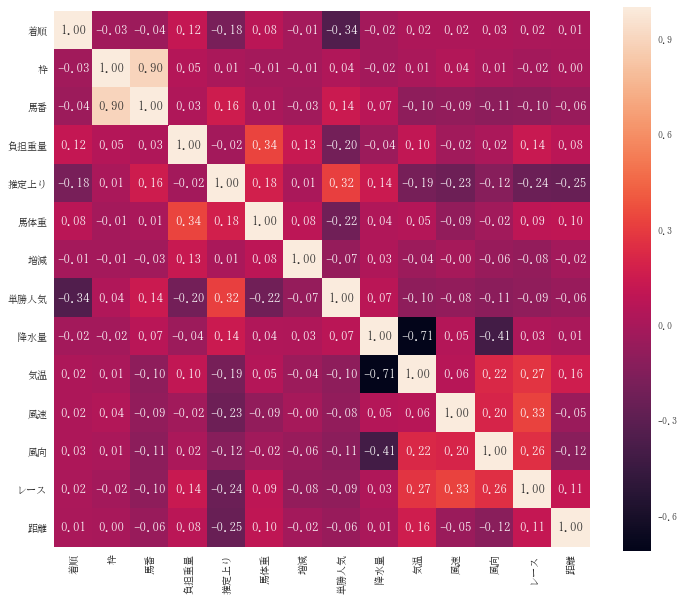

In [21]:
import matplotlib
#https://qiita.com/u1and0/items/3b4d0f3e5514c9893d89 日本語フォントを使用するための
matplotlib.font_manager._rebuild()#chashのreload
#相関行列
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#size_mapping = {'navigation': 0, 'canceled': 1}
#df['着順'] = df['着順'].map(size_mapping)

cols = ['着順','枠','馬番','負担重量','推定上り','馬体重','増減','単勝人気','降水量','気温','風速','風向','レース','距離']

cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
plt.subplots(figsize = (12,10))

sns.set(font=['IPAMincho'])#日本語フォント
sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 13},
                 yticklabels=cols,
                 xticklabels=cols)

#plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
#plt.show()
#df.head()

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# 学習する
def fit(X_train, y_train, X_test, y_test):
    # Create linear regression object
    regr = LogisticRegression(solver='lbfgs', max_iter=1000)
    # Train the model using the training set
    regr.fit(X_train, y_train)
    # Make predictions using the testing set
    predicted = regr.predict(X_test)
    # Check accuracy
    print(accuracy_score(y_test, predicted))
    mat = confusion_matrix(y_test, regr.predict(X_test))
    print(mat)

# 前処理
def preprocessing(keibaData):
    dropdData = keibaData.drop(['性齢', '騎手', '調教師', '風向', '日時'], axis=1)
    newColumns = ["勝負", "枠", "馬番", "馬名", "負担重量", "推定上り", "馬体重", "増減", "単勝人気", 
        "降水量", "気温", "風速", "レース", "距離", "枠2", "馬番2", "馬名2", "負担重量2", "推定上り2", 
        "馬体重2", "増減2", "単勝人気2", "降水量2", "気温2", "風速2", "レース2", "距離2"]
    merge = []
    delete = 0 # 次に削除する最初の番地の保持。
    while len(dropdData) != 0:
        Datas = []
        # 1レース分の取得
        for race in range(len(dropdData.values)):
            Datas.append(list(dropdData.values[race]))
            try:
                if dropdData.values[race+1][0] == 1:
                    break
            except IndexError: # 最後のレースの場合。(次のレースがない)
                break
        # 取得した分を削除する
        dropdData = dropdData.drop(list(range(delete,len(Datas)+delete)))
        delete += len(Datas)
        # パターン作成
        for i in range(len(Datas)):
            for j in range(i+1, len(Datas)):
                if Datas[i][0] < Datas[j][0]: wl = 1 # 勝ち
                else: wl = 0 # 負け
                maeUma = np.delete(Datas[i], 0)
                usiUma = np.delete(Datas[j], 0)
                gyou = np.concatenate([maeUma, usiUma])
                gyou = np.insert(gyou, 0, wl)
                merge.append(list(gyou))
                # 上の追加の逆をする。 例: 上が勝ちパターンなら負けパターン
                if wl == 1: wl = 0
                else: wl = 1
                gyou = np.concatenate([usiUma, maeUma])
                gyou = np.insert(gyou, 0, wl)
                merge.append(list(gyou))
    newData = pd.DataFrame(merge, index=None, columns=newColumns)
    #newData.to_csv("test.csv", encoding="utf-8-sig") # csvで書き出し
    return newData

if __name__ == "__main__":
    keibaData = pd.read_csv("../data/201911.csv",sep=",")
    keibaData = preprocessing(keibaData)
    X = keibaData.drop(columns=['勝負', '馬名', '馬名2'])
    y = keibaData['勝負']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)
    fit(X_train, y_train, X_test, y_test)

0.8657357679914071
[[395  58]
 [ 67 411]]


In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from LightGBM import LightGBM#自作classのimport
import lightgbm as lgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 学習する
def fit(X_train, y_train, X_test, y_test):
    # Create linear regression object
    regr = LogisticRegression(solver='lbfgs', max_iter=1000)
    # Train the model using the training set
    regr.fit(X_train, y_train)
    # Make predictions using the testing set
    predicted = regr.predict(X_test)
    # Check accuracy
    print(accuracy_score(y_test, predicted))
    mat = confusion_matrix(y_test, regr.predict(X_test))
    print(mat)

# 前処理
def preprocessing(keibaData):
    dropdData = keibaData.drop(['性齢', '騎手', '調教師', '風向', '日時'], axis=1)
    newColumns = ["label", "frame", "horse_num", "horse_name", "burden_weight", "estimated_rise", "horse_weight", "fluctuation", "winning_popularity", 
        "precipitation_amount", "temperature", "wind_speed", "rase", "distance", "frame2", "horse_num2", "horse_name2", "burden_weight2", "estimated_rise2", 
        "horse_weight2", "fluctuation2", "winning_popularity2", "precipitation2", "temperature2", "wind_speed2", "rase2", "deistance2"]
    merge = []
    delete = 0 # 次に削除する最初の番地の保持。
    while len(dropdData) != 0:
        Datas = []
        # 1レース分の取得
        for race in range(len(dropdData.values)):
            Datas.append(list(dropdData.values[race]))
            try:
                if dropdData.values[race+1][0] == 1:
                    break
            except IndexError: # 最後のレースの場合。(次のレースがない)
                break
        # 取得した分を削除する
        dropdData = dropdData.drop(list(range(delete,len(Datas)+delete)))
        delete += len(Datas)
        # パターン作成
        for i in range(len(Datas)):
            for j in range(i+1, len(Datas)):
                if Datas[i][0] < Datas[j][0]: wl = 1 # 勝ち
                else: wl = 0 # 負け
                maeUma = np.delete(Datas[i], 0)
                usiUma = np.delete(Datas[j], 0)
                gyou = np.concatenate([maeUma, usiUma])
                gyou = np.insert(gyou, 0, wl)
                merge.append(list(gyou))
                # 上の追加の逆をする。 例: 上が勝ちパターンなら負けパターン
                if wl == 1: wl = 0
                else: wl = 1
                gyou = np.concatenate([usiUma, maeUma])
                gyou = np.insert(gyou, 0, wl)
                merge.append(list(gyou))
    newData = pd.DataFrame(merge, index=None, columns=newColumns,dtype='float64')
    #newData.to_csv("test.csv", encoding="utf-8-sig") # csvで書き出し
    return newData

if __name__ == "__main__":
    lgbm=LightGBM()
    keibaData = pd.read_csv("../data/201911.csv",sep=",")
    keibaData = preprocessing(keibaData)
    #keibaData.columns = ['a', 'b', 'c']
    X = keibaData.drop(columns=['label', 'horse_name', 'horse_name2'])#label,horse_name,horse_name2
    y = keibaData['label']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)
    #print(X)
    #fit(X_train, y_train, X_test, y_test)
    hp=lgbm.hyperparm()
    train_data=lgbm.train_data(X_train,y_train,lgb)
    test_data=lgbm.test_data(X_test,y_test,train_data,lgb)
    #model,optimum_boost_rounds=lgbm.fit(hp,train_data,test_data,lgb)
    evaluation_results = {}
    model=lgb.train(hp,
                    train_data,
                    valid_sets=[train_data, test_data], 
                    valid_names=['Train', 'Test'],
                    evals_result=evaluation_results,
                    num_boost_round=500,
                    early_stopping_rounds=100,
                    verbose_eval=20)
                    #valid_sets=test_data)
    optimum_boost_rounds = model.best_iteration
    #optimum_boost_rounds = model.best_iteration
    y_pred=lgbm.predict(X_test,model)
    fpr=lgbm.accuracy_rate(y_test,y_pred)#fpr,tpr=
    #print("正解率",accuracy_score(y_test, y_pred))
    #mat = confusion_matrix(y_test, y_pred)
    y_pred_list = []
    for x in y_pred:
        y_pred_list.append(np.argmax(x))
    preds = np.round(model.predict(X_test))
    mat = confusion_matrix(y_test, preds)
    print(mat)
    #print(y_test)
    
    print('Accuracy score = \t {}'.format(accuracy_score(y_test, preds)))
    print('Precision score = \t {}'.format(precision_score(y_test, preds)))
    print('Recall score =   \t {}'.format(recall_score(y_test, preds)))
    print('F1 score =      \t {}'.format(f1_score(y_test, preds)))
    

start
Training until validation scores don't improve for 100 rounds
[20]	Train's auc: 0.954948	Test's auc: 0.947288
[40]	Train's auc: 0.972293	Test's auc: 0.958759
[60]	Train's auc: 0.982517	Test's auc: 0.96607
[80]	Train's auc: 0.989448	Test's auc: 0.972254
[100]	Train's auc: 0.993632	Test's auc: 0.975029
[120]	Train's auc: 0.996267	Test's auc: 0.977528
[140]	Train's auc: 0.997911	Test's auc: 0.979047
[160]	Train's auc: 0.998797	Test's auc: 0.979842
[180]	Train's auc: 0.999319	Test's auc: 0.98058
[200]	Train's auc: 0.999651	Test's auc: 0.981079
[220]	Train's auc: 0.999857	Test's auc: 0.982132
[240]	Train's auc: 0.999939	Test's auc: 0.981929
[260]	Train's auc: 0.999964	Test's auc: 0.982552
[280]	Train's auc: 0.999982	Test's auc: 0.982594
[300]	Train's auc: 0.999991	Test's auc: 0.982765
[320]	Train's auc: 0.999998	Test's auc: 0.983254
[340]	Train's auc: 0.999999	Test's auc: 0.983268
[360]	Train's auc: 1	Test's auc: 0.983407
[380]	Train's auc: 1	Test's auc: 0.983305
[400]	Train's auc: 1	

In [70]:
print(evaluation_results)

{'Train': OrderedDict([('auc', [0.8950985753332686, 0.9219482850545877, 0.9239215636226442, 0.9287363530733168, 0.932174100662532, 0.9353328163099824, 0.9368959649274938, 0.9395964357750228, 0.9413756311762346, 0.9431608373727207, 0.9442295624699389, 0.945435424858393, 0.9467741799480553, 0.947948136693347, 0.9497317191204936, 0.9512035093472709, 0.952317215703912, 0.9533977060070463, 0.9539452011462786, 0.9549480069057485, 0.9560534519797851, 0.9570211900189577, 0.958357067903299, 0.9593610131500248, 0.9602890115711512, 0.9616137794547485, 0.9625779565962468, 0.9636131522809629, 0.9642167956547248, 0.96503776773535, 0.9659851374398251, 0.9666908218973442, 0.9675041879005369, 0.9683896264726591, 0.9690601292611554, 0.9698437261597901, 0.9705477298736069, 0.9710512123175837, 0.9717090098231778, 0.9722933958623167, 0.9730934583517977, 0.9737039671362759, 0.9744077144654603, 0.9751110344869236, 0.9755435268748639, 0.9759416067476789, 0.9764768239117299, 0.9771634789320771, 0.9775993328074

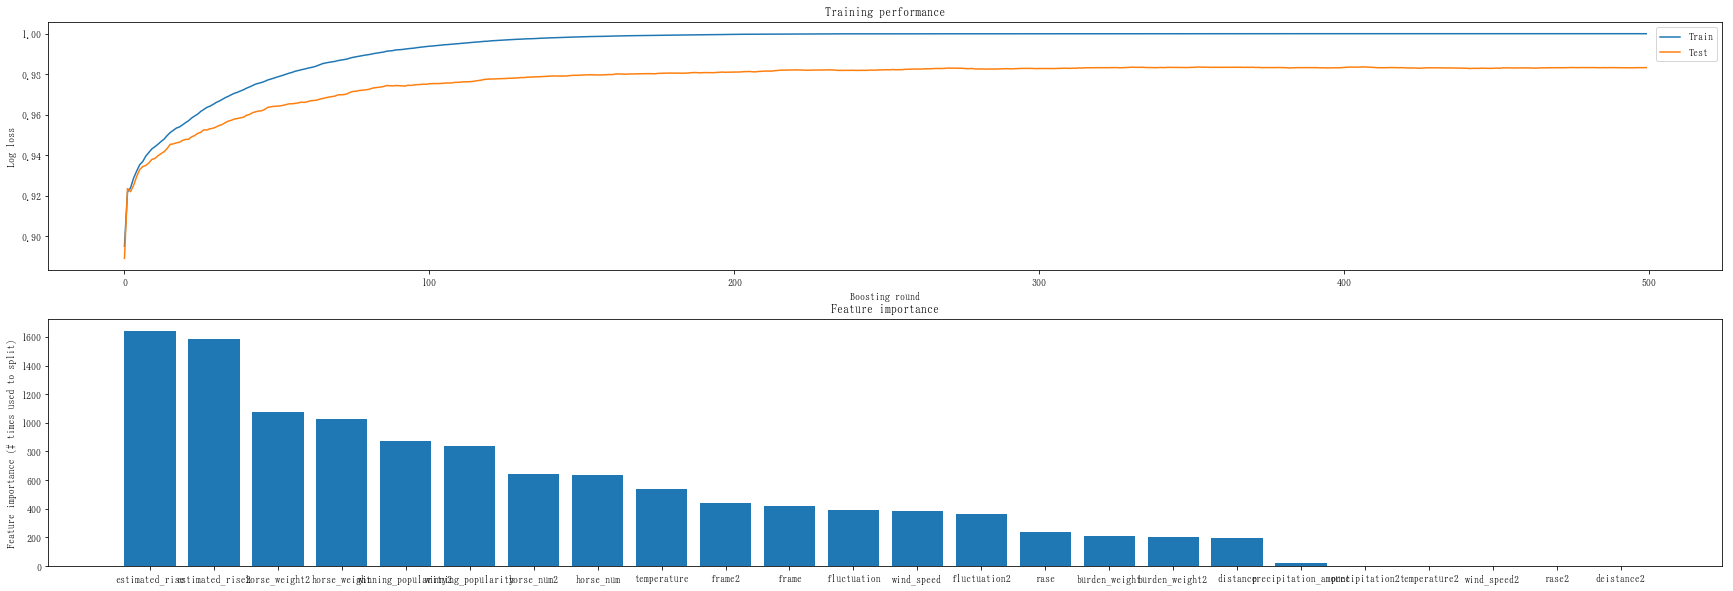

In [72]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=[30, 10])

# Plot the log loss during training
axs[0].plot(evaluation_results['Train']['auc'], label='Train')
axs[0].plot(evaluation_results['Test']['auc'], label='Test')
axs[0].set_ylabel('auc')
axs[0].set_xlabel('Boosting round')
axs[0].set_title('Training performance')
axs[0].legend()

# Plot feature importance
importances = pd.DataFrame({'features': model.feature_name(), 
                            'importance': model.feature_importance()}).sort_values('importance', ascending=False)
axs[1].bar(x=np.arange(len(importances)), height=importances['importance'])
axs[1].set_xticks(np.arange(len(importances)))
axs[1].set_xticklabels(importances['features'])
axs[1].set_ylabel('Feature importance (# times used to split)')
axs[1].set_title('Feature importance')

plt.show()

0.9832174162025363


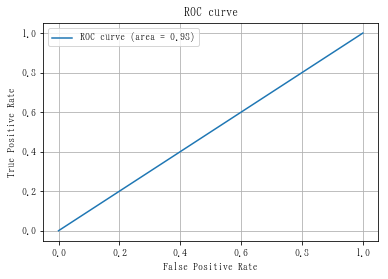

In [73]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)
plt.plot(fpr, fpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)